<a href="https://colab.research.google.com/github/rpaulos/CCMACLRL_EXERCISES_COM232/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [125]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [126]:
# put your answer here
df = pd.read_csv('./Exercise1.csv')
df.head()

,Name,Posts/Shares Frequently?,Active?,Replies to Comments?,# of Friends/Followers,Personality,Unnamed: 6
0,Sebastian,0,1,0,325,1,NaN
1,Nonnie,1,1,1,114,1,NaN
2,Roskoe,1,1,1,338,1,NaN
3,Hanna Angelica,0,0,0,110,0,NaN
4,Marcy,1,1,1,69,1,NaN


Display the summary of all the features of the dataset using `.info()`

In [127]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      100 non-null    object 
 1   Posts/Shares Frequently?  100 non-null    int64  
 2   Active?                   100 non-null    int64  
 3   Replies to Comments?      100 non-null    int64  
 4   # of Friends/Followers    100 non-null    int64  
 5   Personality               100 non-null    int64  
 6   Unnamed: 6                0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 5.6+ KB


Display the total number of samples from each label using `.value_counts()`

In [128]:
df.drop(columns='Unnamed: 6', inplace=True)

In [129]:
df.head()

,Name,Posts/Shares Frequently?,Active?,Replies to Comments?,# of Friends/Followers,Personality
0,Sebastian,0,1,0,325,1
1,Nonnie,1,1,1,114,1
2,Roskoe,1,1,1,338,1
3,Hanna Angelica,0,0,0,110,0
4,Marcy,1,1,1,69,1


In [130]:
# put your answer here
df.value_counts()

,,,,,,count
Name,Posts/Shares Frequently?,Active?,Replies to Comments?,# of Friends/Followers,Personality,
Aldwin,1,1,1,279,1,1
Aleckz,1,1,1,622,1,1
Alexhandra,0,1,0,282,1,1
Allen,0,0,0,338,0,1
Althea,1,1,1,662,1,1
...,...,...,...,...,...,...
Tifany,0,0,0,13,0,1
Timothy,1,1,1,681,1,1
Tristan,0,0,0,52,0,1


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

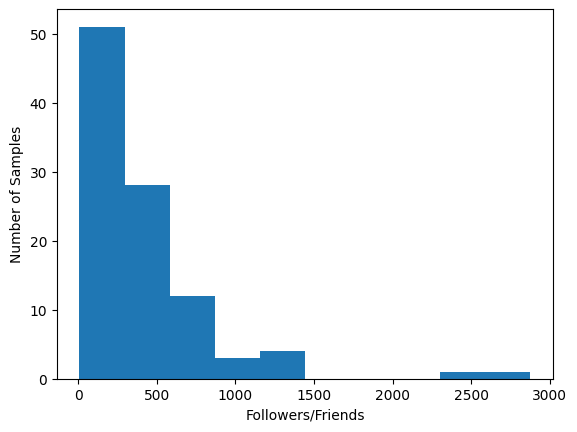

In [131]:
# put your answer here
plt.hist(df["# of Friends/Followers"])
plt.xlabel("Followers/Friends")
plt.ylabel("Number of Samples")
plt.show()

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [132]:
df.drop(columns='Name', inplace=True)

In [133]:
# put your answer here
X = df.drop(columns=['Personality']).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [134]:
# put your answer here

y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [135]:
# put your answer here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Display the dimensions of each variables using `.shape()`

In [136]:
# put your answer here
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [137]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=13)

Train the model using the `.fit()`

In [138]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [139]:
# put your answer here
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

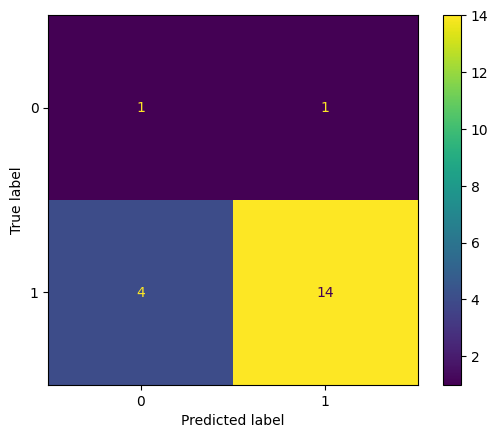

In [140]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [141]:
# put your answer here
metrics.accuracy_score(y_test, y_pred)

0.75

Display the precision

In [145]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.5        0.77777778]


Display the recall

In [146]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.2        0.93333333]


Display the f1-score

In [147]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.28571429 0.84848485]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [151]:
# put your answer here
knn.predict([[0, 1, 1, 1000]])

array([1])